<a href="https://colab.research.google.com/github/Kiedroo12/Finanse/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Lab 3 Tasks
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Note!
Check hints in [Cheatsheet](https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/00_cheatsheet.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Task 3.1
_Get mnist data_

```python
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
```
_Train simple model:_
- Inspect dataset
- Train binary Binary Classifier 5 or not 5 with SGDClassifier
- Measure Accuracy Using Cross-Validation

_Type your code below_

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.int8)

print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)
print("Unique classes:", np.unique(y)[:10])

Dataset shape: (70000, 784)
Labels shape: (70000,)
Unique classes: [0 1 2 3 4 5 6 7 8 9]


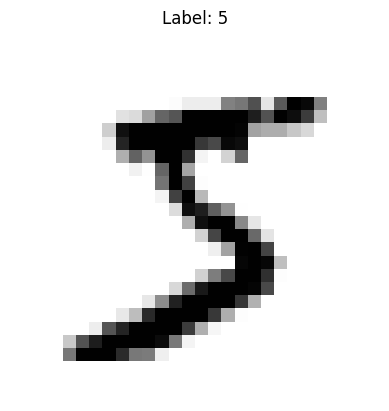

In [3]:
sample_id = 0
image = X[sample_id].reshape(28, 28)
plt.imshow(image, cmap="binary")
plt.title(f"Label: {y[sample_id]}")
plt.axis("off")
plt.show()

In [4]:
y_5 = (y == 5)

print("Positive class count (digit 5):", np.sum(y_5))
print("Negative class count:", np.sum(~y_5))

Positive class count (digit 5): 6313
Negative class count: 63687


In [5]:
sgd_clf = SGDClassifier(random_state=42)

In [6]:
scores = cross_val_score(
    estimator=sgd_clf,
    X=X,
    y=y_5,
    cv=3,
    scoring="accuracy"
)

print("\n=== SGDClassifier Accuracy (binary 5 vs not 5) ===")
print("CV Scores:", scores)
print("Mean Accuracy:", scores.mean())


=== SGDClassifier Accuracy (binary 5 vs not 5) ===
CV Scores: [0.96794377 0.94797069 0.96194231]
Mean Accuracy: 0.9592855905973937


# Task 3.2
_Check model results_
- Check Confusion Matrix
- Get Precision,  Recall and f1 score
_Check Precision/Recall Trade-off_
- Experiment with different threshold values
- Calculate precision-recall curve and make precision-recall plot
- Calculate ROC curve and make ROC curve plot
- Calcuate ROC AUC score

_Type your code below_

In [7]:
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    precision_recall_curve, roc_curve, roc_auc_score
)
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

In [8]:
y_scores = cross_val_predict(
    estimator=sgd_clf,
    X=X,
    y=y_5,
    cv=3,
    method="decision_function"
)

In [9]:
y_pred = (y_scores > 0)

In [10]:
cm = confusion_matrix(y_5, y_pred)
print("=== Confusion Matrix ===")
print(cm)

=== Confusion Matrix ===
[[61910  1777]
 [ 1073  5240]]


In [11]:
precision = precision_score(y_5, y_pred)
recall = recall_score(y_5, y_pred)
f1 = f1_score(y_5, y_pred)

print("\n=== Metrics ===")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


=== Metrics ===
Precision: 0.7468
Recall:    0.8300
F1-score:  0.7862


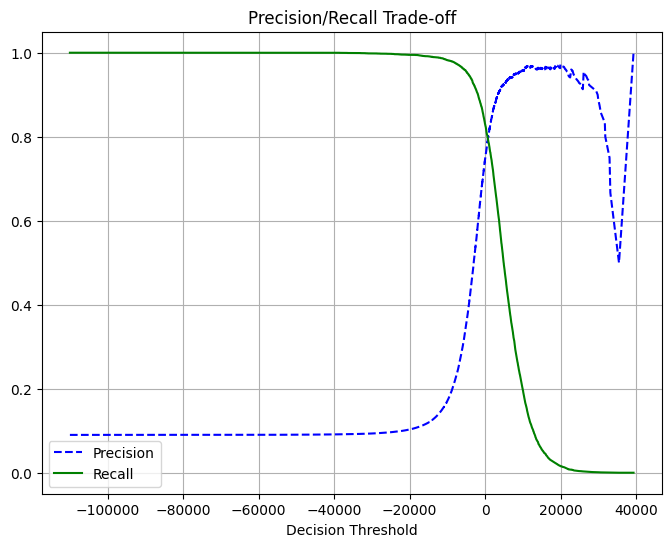

In [12]:
precisions, recalls, thresholds = precision_recall_curve(y_5, y_scores)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.title("Precision/Recall Trade-off")
plt.xlabel("Decision Threshold")
plt.legend()
plt.grid(True)
plt.show()

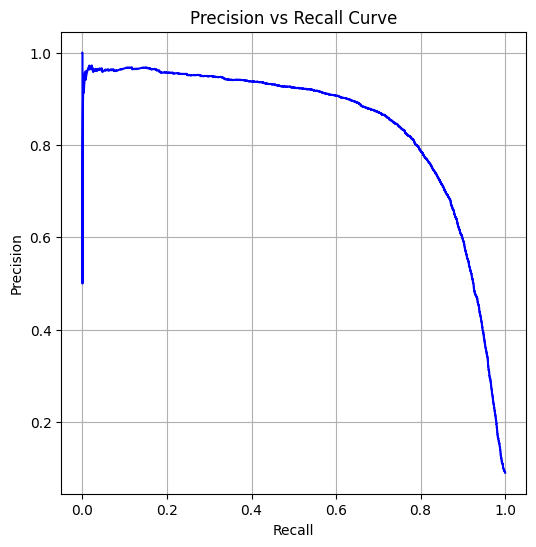

In [13]:
plt.figure(figsize=(6,6))
plt.plot(recalls, precisions, "b")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall Curve")
plt.grid(True)
plt.show()

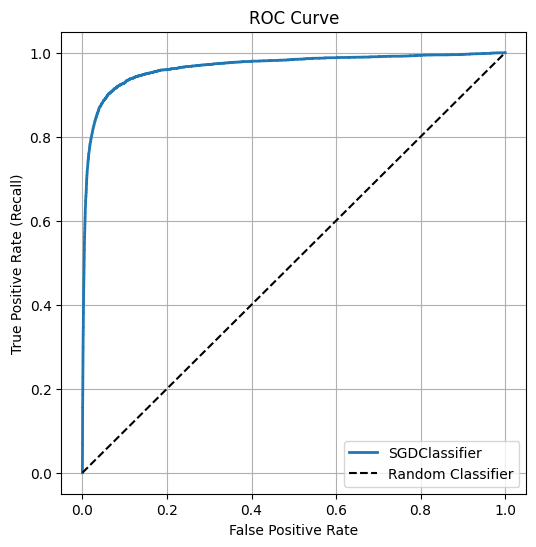

In [14]:
fpr, tpr, roc_thresholds = roc_curve(y_5, y_scores)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, linewidth=2, label="SGDClassifier")
plt.plot([0,1], [0,1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
auc_score = roc_auc_score(y_5, y_scores)
print(f"\n=== ROC AUC Score: {auc_score:.4f} ===")


=== ROC AUC Score: 0.9669 ===


# Task 3.3
_Compare 2 models_
- Train binary Binary Classifier 5 or not 5 with RandomForestClassifier
- Compare results of  RandomForestClassifier with SGDClassifier usign precision-recall curve plot

_Type your code below_

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

In [17]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_scores = cross_val_predict(
    estimator=rf_clf,
    X=X,
    y=y_5,
    cv=3,
    method="predict_proba",
    n_jobs=-1
)

rf_scores = rf_scores[:, 1]

rf_precisions, rf_recalls, rf_thresholds = precision_recall_curve(y_5, rf_scores)

In [18]:
sgd_scores = y_scores

sgd_precisions, sgd_recalls, sgd_thresholds = precision_recall_curve(y_5, sgd_scores)

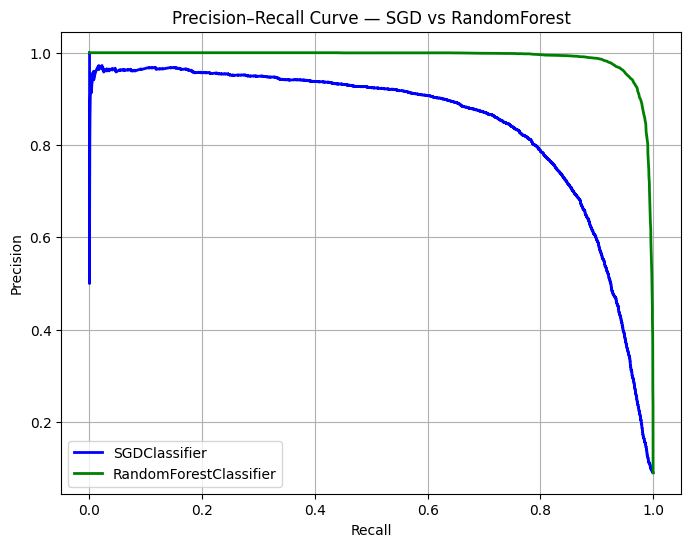

In [19]:
plt.figure(figsize=(8, 6))

plt.plot(sgd_recalls, sgd_precisions, "b-", linewidth=2,
         label="SGDClassifier")
plt.plot(rf_recalls, rf_precisions, "g-", linewidth=2,
         label="RandomForestClassifier")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — SGD vs RandomForest")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
print("=== AVERAGE PRECISION AT DEFAULT THRESHOLD ===")

rf_default_pred = (rf_scores > 0.5)
sgd_default_pred = (sgd_scores > 0.0)

from sklearn.metrics import precision_score, recall_score, f1_score

print("\n--- SGDClassifier ---")
print("Precision:", precision_score(y_5, sgd_default_pred))
print("Recall:   ", recall_score(y_5, sgd_default_pred))
print("F1-score: ", f1_score(y_5, sgd_default_pred))

print("\n--- RandomForestClassifier ---")
print("Precision:", precision_score(y_5, rf_default_pred))
print("Recall:   ", recall_score(y_5, rf_default_pred))
print("F1-score: ", f1_score(y_5, rf_default_pred))

=== AVERAGE PRECISION AT DEFAULT THRESHOLD ===

--- SGDClassifier ---
Precision: 0.7467578737352145
Recall:    0.8300332646919056
F1-score:  0.7861965491372843

--- RandomForestClassifier ---
Precision: 0.9910554561717353
Recall:    0.877554253128465
F1-score:  0.9308577669495085


# Task 3.4
_Perform Multiclass Classification_
- Train binary Multiclass Classifier (0-9) with Support Vector Classifier (SVC)

_Error Analysis_
- display multiclass Confusion Matrix
- display multiclass Confusion Matrix normalized by row

_Type your code below_

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [23]:
X_small, _, y_small, _ = train_test_split(
    X, y,
    test_size=0.85,
    random_state=42,
    stratify=y
)

print("Training subset for SVC:", X_small.shape, y_small.shape)

Training subset for SVC: (10500, 784) (10500,)


In [24]:
svc_clf = SVC(
    kernel="rbf",
    gamma="scale",
    C=5,
    decision_function_shape="ovr"
)

svc_clf.fit(X_small, y_small)

y_pred_svc = svc_clf.predict(X)

In [25]:
cm = confusion_matrix(y, y_pred_svc)
print("Confusion Matrix shape:", cm.shape)

Confusion Matrix shape: (10, 10)


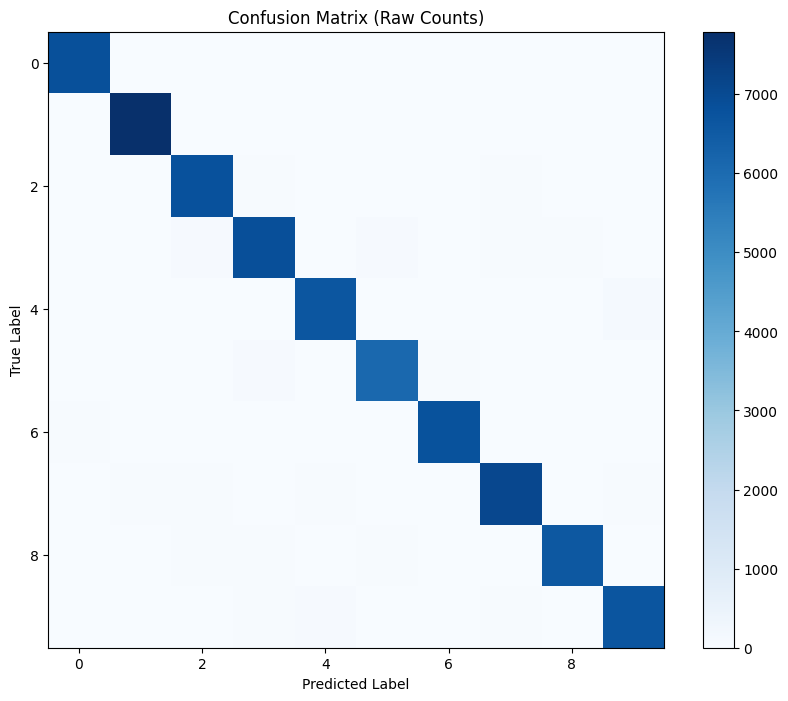

In [26]:
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (Raw Counts)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()

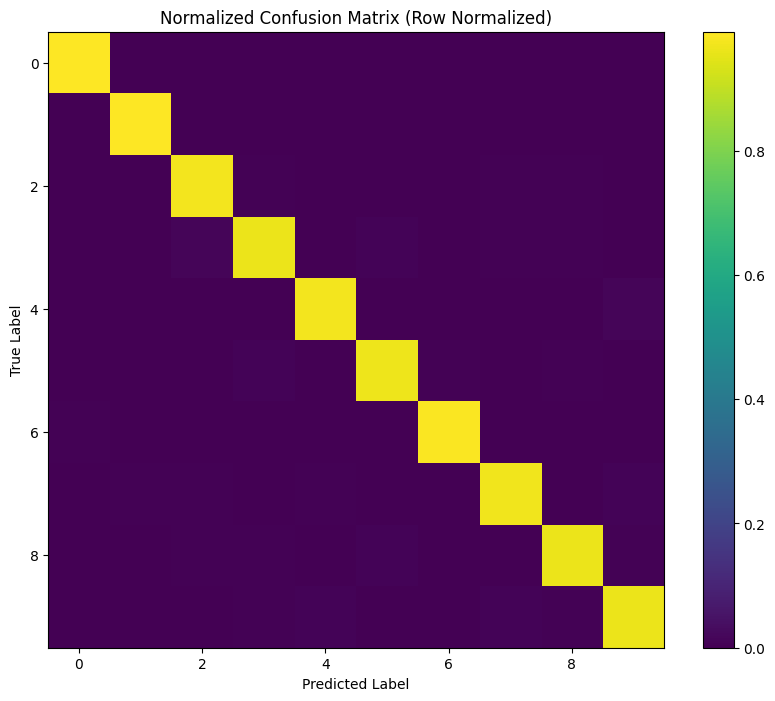

In [27]:
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(10, 8))
plt.imshow(cm_norm, cmap="viridis")
plt.title("Normalized Confusion Matrix (Row Normalized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()

In [28]:
print("\nExample normalized row:", cm_norm[5])


Example normalized row: [2.69285601e-03 6.33613179e-04 2.53445272e-03 1.15634405e-02
 2.05924283e-03 9.66101695e-01 6.17772850e-03 6.33613179e-04
 4.75209884e-03 2.85125931e-03]


# Task 3.5
 _Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the `KNeighborsClassifier` works quite well for this task; you just need to find good hyperparameter values (try a grid search on the `weights` and `n_neighbors` hyperparameters)._

 _Type your code below_

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

In [34]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,
    test_size=10000,
    random_state=42,
    stratify=y
)

X_train, _, y_train, _ = train_test_split(
    X_train_full, y_train_full,
    test_size=0.5,
    random_state=42,
    stratify=y_train_full
)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (30000, 784)
Test size: (10000, 784)


In [35]:
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

In [37]:
param_grid = {
    "knn__n_neighbors": [3, 4, 5, 7, 9],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2],
}

grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 4, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [39]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("\n===== BEST KNN MODEL =====")
print("Best params:", grid_search.best_params_)
print(f"Test Accuracy: {test_accuracy:.4f}")


===== BEST KNN MODEL =====
Best params: {'knn__n_neighbors': 4, 'knn__p': 1, 'knn__weights': 'distance'}
Test Accuracy: 0.9545


# Task 3.6
_Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. You can use the `shift()` function from the `scipy.ndimage` module. For example, `shift(image, [2, 1], cval=0)` shifts the image two pixels down and one pixel to the right. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation_ or _training set expansion_._


_Type your code below_

In [42]:
import numpy as np
from scipy.ndimage import shift
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [43]:
def shift_image(image, dx, dy):
    """
    Shifts a 28x28 image by dx, dy pixels.
    dx > 0 → shift down
    dy > 0 → shift right
    """
    image_reshaped = image.reshape(28, 28)
    shifted = shift(image_reshaped, [dx, dy], cval=0, mode="constant")
    return shifted.reshape(-1)

In [44]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,
    test_size=10000,
    random_state=42,
    stratify=y
)

# For speed, use subset of 10000 training images
X_train = X_train_full[:10000]
y_train = y_train_full[:10000]

print("Base training size:", X_train.shape)

Base training size: (10000, 784)


In [45]:
X_augmented = [X_train]
y_augmented = [y_train]

shifts = [(1, 0), (-1, 0), (0, 1), (0, -1)]

for dx, dy in shifts:
    shifted_images = np.array([shift_image(img, dx, dy) for img in X_train])
    X_augmented.append(shifted_images)
    y_augmented.append(y_train)

X_train_aug = np.concatenate(X_augmented, axis=0)
y_train_aug = np.concatenate(y_augmented, axis=0)

print("Augmented training size:", X_train_aug.shape)

Augmented training size: (50000, 784)


In [46]:
knn_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=4, weights="distance", p=1))
])

knn_clf.fit(X_train_aug, y_train_aug)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=4, p=1, weights='distance'))])

In [47]:
y_pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n===== Accuracy AFTER Data Augmentation =====")
print(f"Test Accuracy: {accuracy:.4f}")


===== Accuracy AFTER Data Augmentation =====
Test Accuracy: 0.9472


# Task 3.7
_Solve Titanic challenge on [Kaggle](https://www.kaggle.com/c/titanic). Alternatively, or get two CSV files: train.csv and test.csv  from :_
```python
url_titanic_train = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/titanic/train.csv'
url_titanic_test = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/titanic/test.csv'
```

 _The goal is to train a classifier that can predict the `Survived` column based on the other columns._

# Task 3.8

_Build a spam classifier:_

* _Download examples of spam and ham from [Apache SpamAssassin's public datasets](https://spamassassin.apache.org/old/publiccorpus/)._
* _Unzip the datasets and familiarize yourself with the data format._
* _Split the datasets into a training set and a test set._
* _Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, "Hello," "how," "are," "you," then the email "Hello you Hello Hello you" would be converted into a vector [1, 0, 0, 1] (meaning [“Hello" is present, "how" is absent, "are" is absent, "you" is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word._

_You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with "URL," replace all numbers with "NUMBER," or even perform _stemming_ (i.e., trim off word endings; there are Python libraries available to do this)._

_Finally, try out several classifiers and see if you can build a spam classifier, with both high recall and high precision._